<a href="https://colab.research.google.com/github/ggonzalesd/3DReconstruction/blob/main/MachineLearning3dReconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install binvox trimesh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
#import binvox
#import trimesh
import matplotlib.pyplot as plt
import random
#import keras
#print('Keras version:', keras.__version__)

In [3]:
!curl https://raw.githubusercontent.com/ggonzalesd/3DReconstruction/main/dataset.npy > dataset.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 30.7M  100 30.7M    0     0  4257k      0  0:00:07  0:00:07 --:--:-- 4273k


In [8]:
dataset = np.load("dataset.npy", allow_pickle=True).item()

In [9]:
models_train, models_test = dataset['train'], dataset['test']

In [10]:
models_train_x = models_train['x']
models_train_y = models_train['y']
models_test_x = models_test['x']
models_test_y = models_test['y']

In [18]:
index = random.randint(0, len(models_train_x)-1)
model = models_train_x[index]
model_fractured = models_train_x[index]
model_recontruct = models_train_y[index]

In [20]:
index

367

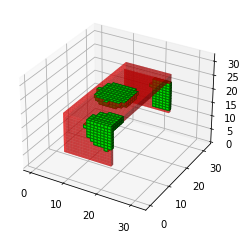

In [19]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(model_fractured, facecolors='red', alpha=0.5)
ax.voxels(model_recontruct, facecolors='lime', edgecolors='green')
plt.show()

In [13]:
models_train_x.shape

(392, 32, 32, 32)